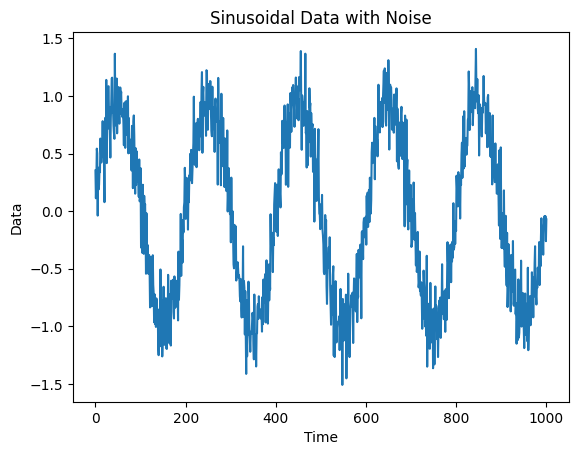

[ 0.35281047  0.11147363  0.25860089  0.54238088  0.49896963 -0.03886581
  0.37758434  0.18808662  0.22828978  0.36138258]


In [69]:
import numpy as np

# Set the random seed for reproducibility
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Generate the time values from 0 to 1000
time = np.linspace(0, 1000, num=1000)

# Generate the sinusoidal data with some noise
frequency = 5  # Frequency of the sinusoid
noise_std = .2  # Standard deviation of the noise
data = np.sin(2 * np.pi * frequency * time) + np.random.normal(0, noise_std, size=len(time))

# Plot the data
plt.plot(time, data)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Sinusoidal Data with Noise')
plt.show()
print(data[:10])

In [70]:
X = []
y = []
points_per_period = 1000/frequency
for i in range(0, len(data) - int(points_per_period)):
    X.append(data[i:i+int(points_per_period)])
    y.append(data[i+int(points_per_period)])

In [81]:
import tensorflow as tf

# define lstm model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(50, activation='tanh', input_shape=(int(points_per_period), 1)))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

Epoch 1/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4636
Epoch 2/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0705
Epoch 3/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0517
Epoch 4/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0471
Epoch 5/20
25/25 [==============================] - 0s 20ms/step - loss: 0.0453
Epoch 6/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0451
Epoch 7/20
25/25 [==============================] - 0s 20ms/step - loss: 0.0444
Epoch 8/20
25/25 [==============================] - 1s 20ms/step - loss: 0.0446
Epoch 9/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0442
Epoch 10/20
25/25 [==============================] - 1s 20ms/step - loss: 0.0442
Epoch 11/20
25/25 [==============================] - 1s 20ms/step - loss: 0.0440
Epoch 12/20
25/25 [==============================] - 0s 20ms/step - loss: 0.0439
Epoch 13/20
25/25 [==================

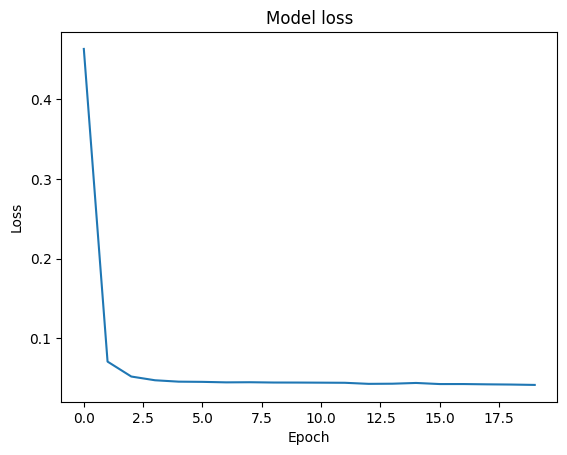

In [82]:
history = model.fit(np.array(X).reshape(-1, int(points_per_period), 1), np.array(y), epochs=20, batch_size=32)

# Plot the loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [84]:
def forecast(model, initial_sequence, n_steps):
    sequence = initial_sequence.copy()
    predictions = []

    for _ in range(n_steps):
        prediction = model.predict(sequence[np.newaxis, :])[0,0]
        predictions.append(prediction)

        sequence = np.roll(sequence, -1)
        sequence[-1] = prediction

    return predictions

pred = forecast(model, data[:int(points_per_period)], int(points_per_period))

1/1 [==============================] - 0s 10ms/step


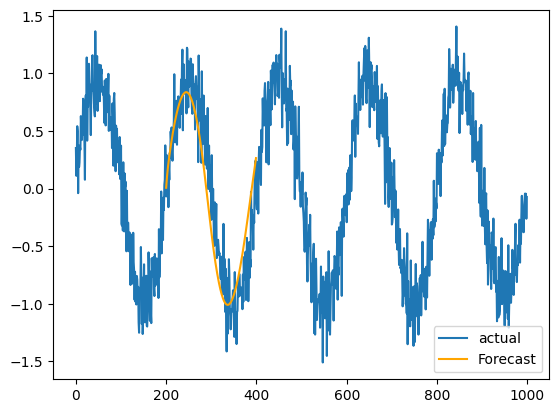

In [90]:
ax, fig = plt.subplots()
plt.plot(data, label='actual')
plt.plot(range(int(points_per_period), int(points_per_period)*2), pred, label='Forecast', color='orange')
plt.legend()
plt.show()
